In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn import metrics

import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
df= pd.read_csv("merge_distance_intensity.csv")

In [3]:
df.dropna(inplace=True)

df["damage_grade"] = df["damage_grade"].str.replace("Grade ", "")
df["damage_grade"] = df["damage_grade"].astype(int)
rubble = ["Damaged-Rubble unclear", "Damaged-Rubble clear", "Damaged-Rubble Clear-New building built"]
damage = ["Damaged-Used in risk", "Damaged-Repaired and used", "Damaged-Not used"]
landslide = "Covered by landslide"
nd = "Not damaged"


df["land_surface_condition"] = df["land_surface_condition"].replace("Flat", 0)
df["land_surface_condition"] = df["land_surface_condition"].replace("Moderate slope", 1)
df["land_surface_condition"] = df["land_surface_condition"].replace("Steep slope", 2)

df["foundation_type"] = df["foundation_type"].replace("Other",2)
df["foundation_type"] = df["foundation_type"].replace("Mud mortar-Stone/Brick",0)
df["foundation_type"] = df["foundation_type"].replace("Cement-Stone/Brick",1)
df["foundation_type"] = df["foundation_type"].replace("Bamboo/Timber",3)
df["foundation_type"] = df["foundation_type"].replace("RC",4)

df["roof_type"] = df["roof_type"].replace("RCC/RB/RBC",0)
df["roof_type"] = df["roof_type"].replace("Bamboo/Timber-Light roof",1)
df["roof_type"] = df["roof_type"].replace("Bamboo/Timber-Heavy roof",2)

df["ground_floor_type"] = df["ground_floor_type"].replace("Mud",0)
df["ground_floor_type"] = df["ground_floor_type"].replace("Brick/Stone",1)
df["ground_floor_type"] = df["ground_floor_type"].replace("RC",3)
df["ground_floor_type"] = df["ground_floor_type"].replace("Timber",4)
df["ground_floor_type"] = df["ground_floor_type"].replace("Other",2)

df["other_floor_type"] = df["other_floor_type"].replace("Not applicable",0)
df["other_floor_type"] = df["other_floor_type"].replace("TImber/Bamboo-Mud",2)
df["other_floor_type"] = df["other_floor_type"].replace("Timber-Planck",1)
df["other_floor_type"] = df["other_floor_type"].replace("RCC/RB/RBC",3)

df["position"] = df["position"].replace("Not attached",0)
df["position"] = df["position"].replace("Attached-1 side",1)
df["position"] = df["position"].replace("Attached-2 side",2)
df["position"] = df["position"].replace("Attached-3 side",3)

df = pd.get_dummies(data = df, columns = ["plan_configuration"])

In [4]:
df.shape

(661282, 43)

In [5]:
X = df[[ 'Intensity','count_floors_pre_eq',  'age_building',
       'plinth_area_sq_ft', 'height_ft_pre_eq', 
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
       'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
        'plan_configuration_Building with Central Courtyard',
       'plan_configuration_E-shape', 'plan_configuration_H-shape',
       'plan_configuration_L-shape', 'plan_configuration_Multi-projected',
       'plan_configuration_Others', 'plan_configuration_Rectangular',
       'plan_configuration_Square', 'plan_configuration_T-shape',
       'plan_configuration_U-shape']]

y =df["damage_grade"]

In [6]:
X.shape
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Lasso Regression F1: 0.45013874501916723
              precision    recall  f1-score   support

           1       0.49      0.72      0.58     13538
           2       0.30      0.03      0.05     14542
           3       0.28      0.06      0.10     23287
           4       0.33      0.08      0.13     31850
           5       0.46      0.93      0.62     49040

    accuracy                           0.45    132257
   macro avg       0.37      0.36      0.30    132257
weighted avg       0.38      0.45      0.34    132257

Lasso Regression Accuracy: 0.45013874501916723
Lasso Regression Misclassification Rate: 0.5498612549808328
Lasso Regression Precision: 0.45013874501916723
Lasso Regression Lasso Regression Recall: 0.45013874501916723
Lasso Regression F-measure: 0.45013874501916723
Ridge Regression F1: 0.4497077659405551
Ridge Regression Accuracy: 0.4497077659405551
Ridge Regression Misclassification Rate: 0.5502922340594449
Ridge Regression Precision: 0.4497077659405551
Ridge Regres

C:\Users\cerul\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Elastic Net Regression F1: 0.4305556605699509
Elastic Net Regression Accuracy: 0.4305556605699509
Elastic Net Regression Misclassification Rate: 0.569444339430049
Elastic Net Regression Precision: 0.4305556605699509
Elastic Net Regression Recall: 0.4305556605699509
Elastic Net Regression F-measure: 0.4305556605699509


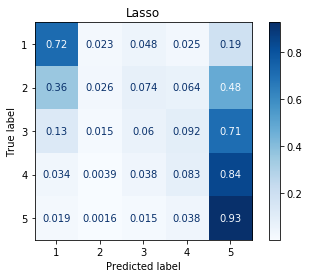

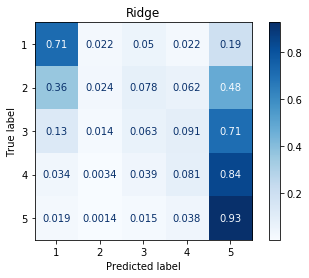

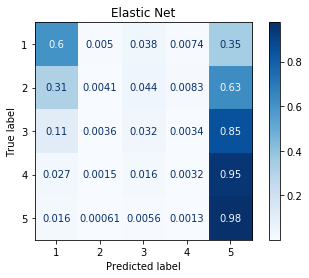

In [7]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

C = [1]

for c in C:
    clf = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    clf.fit(X_train, y_train)
    pred_train_clf= clf.predict(X_train)
    pred_test_clf= clf.predict(X_test)
    print('Lasso Regression F1:', f1_score(y_test, pred_test_clf, average = 'micro'))
    print(classification_report(y_test, pred_test_clf))
    
    # Accuracy - Multinomial 
    accuracy_clf = accuracy_score(y_test,pred_test_clf)
    print("Lasso Regression Accuracy:", accuracy_clf)

    #Misclassification rate 
    misclassified_clf = 1 - accuracy_clf
    print("Lasso Regression Misclassification Rate:", misclassified_clf)

    # Precision and Recall
    precision_clf = metrics.precision_score(y_test,pred_test_clf, average = 'micro')
    recall_clf = metrics.recall_score(y_test, pred_test_clf, average = 'micro')
    f_measure_clf = metrics.f1_score(y_test, pred_test_clf, average = 'micro')
    print("Lasso Regression Precision:",precision_clf)
    print("Lasso Regression Lasso Regression Recall:",recall_clf)
    print("Lasso Regression F-measure:",f_measure_clf)
    disp = plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues,normalize="true").ax_.set_title("Lasso")   

for c in C:
    clf = LogisticRegression(penalty='l2', C=c, solver='liblinear')
    clf.fit(X_train, y_train)
    pred_train_clf= clf.predict(X_train)
    pred_test_clf= clf.predict(X_test)
    print('Ridge Regression F1:', f1_score(y_test, pred_test_clf, average = 'micro'))
    # Accuracy - Multinomial 
    accuracy_clf = accuracy_score(y_test,pred_test_clf)
    print("Ridge Regression Accuracy:", accuracy_clf)

    #Misclassification rate 
    misclassified_clf = 1 - accuracy_clf
    print("Ridge Regression Misclassification Rate:", misclassified_clf)

    # Precision and Recall
    precision_clf = metrics.precision_score(y_test,pred_test_clf, average = 'micro')
    recall_clf = metrics.recall_score(y_test, pred_test_clf, average = 'micro')
    f_measure_clf = metrics.f1_score(y_test, pred_test_clf, average = 'micro')
    print("Ridge Regression Precision:",precision_clf)
    print("Ridge Regression Recall:",recall_clf)
    print("Ridge Regression F-measure:",f_measure_clf)
    disp = plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues,normalize="true").ax_.set_title("Ridge")
    
for c in C:
    clf = LogisticRegression(penalty='elasticnet', C=c, solver='saga',l1_ratio=0.5)
    clf.fit(X_train, y_train)
    pred_train_clf= clf.predict(X_train)
    pred_test_clf= clf.predict(X_test)
    print('Elastic Net Regression F1:', f1_score(y_test, pred_test_clf, average = 'micro'))
    
    # Accuracy - Multinomial 
    accuracy_clf = accuracy_score(y_test,pred_test_clf)
    print("Elastic Net Regression Accuracy:", accuracy_clf)

    #Misclassification rate 
    misclassified_clf = 1 - accuracy_clf
    print("Elastic Net Regression Misclassification Rate:", misclassified_clf)

    # Precision and Recall
    precision_clf = metrics.precision_score(y_test,pred_test_clf, average = 'micro')
    recall_clf = metrics.recall_score(y_test, pred_test_clf, average = 'micro')
    f_measure_clf = metrics.f1_score(y_test, pred_test_clf, average = 'micro')
    print("Elastic Net Regression Precision:",precision_clf)
    print("Elastic Net Regression Recall:",recall_clf)
    print("Elastic Net Regression F-measure:",f_measure_clf)
    disp = plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues,normalize="true").ax_.set_title("Elastic Net")
